# 1. Deep Neural Nerwork - 다층 퍼셉트론 구현


In [2]:
import torch
import torch.nn as nn

In [3]:
# GPU 확인
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [15]:
# 4명의 데이터 
 
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [16]:
model = nn.Sequential(
          nn.Linear(2, 10, bias=True), # input_layer = 2, hidden_layer1 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer1 = 10, hidden_layer2 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer2 = 10, hidden_layer3 = 10
          nn.Sigmoid(),
          nn.Linear(10, 1, bias=True), # hidden_layer3 = 10, output_layer = 1
          nn.Sigmoid()
          ).to(device)

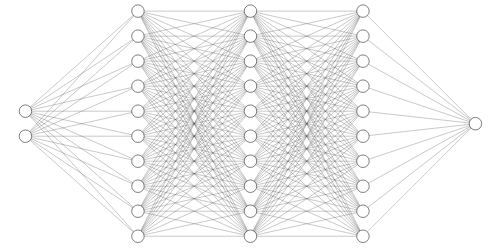

In [17]:
criterion = torch.nn.MSELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)  

In [18]:
for epoch in range(50):
    optimizer.zero_grad()
    # forward 연산
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    # 100의 배수에 해당되는 에포크마다 비용을 출력
    if epoch % 5 == 0:
        print("에폭:", epoch, cost.item())

에폭: 0 0.2599550187587738
에폭: 5 0.2599121928215027
에폭: 10 0.2598695755004883
에폭: 15 0.2598271369934082
에폭: 20 0.25978484749794006
에폭: 25 0.259742796421051
에폭: 30 0.25970083475112915
에폭: 35 0.2596590518951416
에폭: 40 0.2596174478530884
에폭: 45 0.2595760226249695


In [21]:
X_2 = torch.FloatTensor([[0, 0], [0, 1]]).to(device)
hypothesis = model(X_2)
print(hypothesis)

tensor([[0.5975],
        [0.5972]], device='cuda:0', grad_fn=<SigmoidBackward0>)


# 2. minibatch DNN

In [22]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

In [23]:
# GPU 확인
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [24]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [25]:
dataset = TensorDataset(x_train, y_train)

In [26]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [33]:
model = nn.Sequential(
          nn.Linear(3, 10, bias=True), # input_layer = 2, hidden_layer1 = 10
          nn.ReLU(),
          nn.Linear(10, 10, bias=True), # hidden_layer1 = 10, hidden_layer2 = 10
          nn.ReLU(),
          nn.Linear(10, 10, bias=True), # hidden_layer2 = 10, hidden_layer3 = 10
          nn.ReLU(),
          nn.Linear(10, 1, bias=True), # hidden_layer3 = 10, output_layer = 1
          nn.ReLU()
          ).to(device)

In [36]:
criterion = torch.nn.MSELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) # 0.00001

In [41]:
nb_epochs = 5
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):

    x_train, y_train = samples
    x_train= x_train.to(device)
    y_train= y_train.to(y_train)

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = criterion(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

Epoch    0/5 Batch 1/3 Cost: 27573.769531
Epoch    0/5 Batch 2/3 Cost: 36114.539062
Epoch    0/5 Batch 3/3 Cost: 20009.367188
Epoch    1/5 Batch 1/3 Cost: 28479.906250
Epoch    1/5 Batch 2/3 Cost: 26104.449219
Epoch    1/5 Batch 3/3 Cost: 38198.406250
Epoch    2/5 Batch 1/3 Cost: 27011.630859
Epoch    2/5 Batch 2/3 Cost: 35196.335938
Epoch    2/5 Batch 3/3 Cost: 22931.675781
Epoch    3/5 Batch 1/3 Cost: 26098.382812
Epoch    3/5 Batch 2/3 Cost: 28471.125000
Epoch    3/5 Batch 3/3 Cost: 38189.558594
Epoch    4/5 Batch 1/3 Cost: 36098.789062
Epoch    4/5 Batch 2/3 Cost: 26093.328125
Epoch    4/5 Batch 3/3 Cost: 22924.822266
Epoch    5/5 Batch 1/3 Cost: 30553.679688
Epoch    5/5 Batch 2/3 Cost: 33094.683594
Epoch    5/5 Batch 3/3 Cost: 19993.466797


In [44]:
X_2 = torch.FloatTensor([[100, 70, 60], [150, 30,75]]).to(device)
hypothesis = model(X_2)
print(hypothesis)

tensor([[0.6049],
        [0.2376]], device='cuda:0', grad_fn=<ReluBackward0>)


# 3.CNN

In [88]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

In [89]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 랜덤 시드 고정
torch.manual_seed(777)

In [90]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [91]:
mnist_train = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                          train=True, # True를 지정하면 훈련 데이터로 다운로드
                          transform=transforms.ToTensor(), # 텐서로 변환
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                         train=False, # False를 지정하면 테스트 데이터로 다운로드
                         transform=transforms.ToTensor(), # 텐서로 변환
                         download=True)

In [92]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [93]:
# torch.nn.Module:  PyTorch의 모든 Neural Network의 Base Class
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        # 첫번째층
        # ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 32)
        #    Pool     -> (?, 14, 14, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # 두번째층
        # ImgIn shape=(?, 14, 14, 32)
        #    Conv      ->(?, 14, 14, 64)
        #    Pool      ->(?, 7, 7, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # 전결합층 7x7x64 inputs -> 10 outputs
        self.fc = torch.nn.Linear(7 * 7 * 64, 10, bias=True)

        # 전결합층 한정으로 가중치 초기화
        torch.nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)   # 전결합층을 위해서 Flatten
        out = self.fc(out)
        return out

In [94]:
# CNN 모델 정의
model = CNN().to(device)

In [95]:
criterion = torch.nn.CrossEntropyLoss().to(device)    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [96]:
total_batch = len(data_loader)
print('총 배치의 수 : {}'.format(total_batch))

총 배치의 수 : 600


In [97]:
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y는 레이블.
        # image is already size of (28x28), no reshape

        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

[Epoch:    1] cost = 0.2256421
[Epoch:    2] cost = 0.0627891943
[Epoch:    3] cost = 0.0457382426
[Epoch:    4] cost = 0.0369280614
[Epoch:    5] cost = 0.0306359213
[Epoch:    6] cost = 0.0254509449
[Epoch:    7] cost = 0.021221431
[Epoch:    8] cost = 0.0177948736
[Epoch:    9] cost = 0.0152473133
[Epoch:   10] cost = 0.0128691113
[Epoch:   11] cost = 0.0103328135
[Epoch:   12] cost = 0.00953757763
[Epoch:   13] cost = 0.0077864374
[Epoch:   14] cost = 0.0063779722
[Epoch:   15] cost = 0.00685668457


In [56]:
# 학습을 진행하지 않을 것이므로 torch.no_grad(), gradient descent를 하지마라고 명령내리는 것
with torch.no_grad():
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
                        # CNN은 10개의 아웃풋으로 각 10개의 클래스에 대한 피처값이 나온다, 이를 axis 1방향으로 max값을 찾는다는 것
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

tensor([[ -8381.2920,  -2388.8928,  -1457.0394,  ...,   6698.6655,
          -4456.2212,   -445.0339],
        [ -3194.2307,  -1917.7179,   6217.0986,  ...,  -5208.9468,
          -2326.6980,  -3852.9011],
        [ -6012.2510,   2943.2156,  -1795.8075,  ...,   -637.8889,
            167.8731,  -3228.5212],
        ...,
        [-10338.8262,  -3090.0662,  -7162.4688,  ...,   -638.7309,
           -657.0729,  -1925.7141],
        [ -3230.3027,  -8289.6660,  -4961.1104,  ...,  -3646.3950,
           1220.7040,  -6229.2729],
        [ -3928.2534,  -7493.3770,  -3475.1199,  ...,  -6658.4014,
          -2299.4519,  -5115.9268]], device='cuda:0')
Accuracy: 0.9860000014305115


/usr/local/lib/python3.9/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.9/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [98]:
# 모델 저장 
torch.save(model.state_dict(),"cnn_model.pt")

# 3-1. 다시불러와서 추론 해보기

In [99]:
# 다시불러와서 추론 해보기
model = CNN().to(device)
model.load_state_dict(torch.load("cnn_model.pt")) 
model.eval() #평가 모드로 설정하여야 합니다. 이 과정을 거치지 않으면 일관성 없는 추론 결과가 출력

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=3136, out_features=10, bias=True)
)

In [100]:
# 학습을 진행하지 않을 것이므로 torch.no_grad(), gradient descent를 하지마라고 명령내리는 것
with torch.no_grad():
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
  
    prediction = model(X_test)
                        # CNN은 10개의 아웃풋으로 각 10개의 클래스에 대한 피처값이 나온다, 이를 axis 1방향으로 max값을 찾는다는 것
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

Accuracy: 0.9872999787330627


/usr/local/lib/python3.9/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.9/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


# 3-2 이미지 불러서 추론해보기

In [102]:
# 학습을 진행하지 않을 것이므로 torch.no_grad(), gradient descent를 하지마라고 명령내리는 것

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

with torch.no_grad():

    # 이미지 파일 경로 설정
    img = Image.open("./8.png")
    transform = transforms.Compose([
          transforms.Grayscale(num_output_channels=1), # RGB(3D) -> Gray(2D)
          transforms.Resize((28, 28)), # 모델 인풋에 맞게
          transforms.ToTensor(), # 토치 텐서 타입으로 맞춰줘야함
      ])
    
    img_tensor = transform(img).to(device) # [1, 28, 28]
    img_tensor = img_tensor.unsqueeze(0) # [1, 1, 28, 28]

    print(img_tensor.shape)

    prediction = model(img_tensor)
                        # CNN은 10개의 아웃풋으로 각 10개의 클래스에 대한 피처값이 나온다, 이를 axis 1방향으로 max값을 찾는다는 것 
    print('result:', torch.argmax(prediction, 1))

torch.Size([1, 1, 28, 28])
result: tensor([8], device='cuda:0')
